# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Notebook Presentation

In [79]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [80]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [81]:
data.shape

(5391, 6)

In [82]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3976,2294,9/12/2011,Tinker Tailor Soldier Spy,"$21,000,000","$81,452,811","$24,149,393"
3544,4422,12/31/2009,Chicago Overcoat,"$3,000,000",$0,$0
3849,1673,2/18/2011,"Big Mommas: Like Father, Like Son","$32,000,000","$82,332,450","$37,915,414"
2674,3625,5/19/2006,See No Evil,"$8,000,000","$18,828,036","$15,032,800"
862,3417,4/10/1996,Crash,"$10,000,000","$3,357,324","$3,357,324"


In [83]:
data.isna().values.any()

False

In [84]:
data.duplicated().values.any()

False

In [85]:
data["Movie_Title"].value_counts()

Movie_Title
Ben-Hur                             3
King Kong                           3
Home                                3
The Birth of a Nation               2
The Gambler                         2
                                   ..
Insomnia                            1
Spirit: Stallion of the Cimarron    1
The Importance of Being Earnest     1
The Believer                        1
Story of Bonnie and Clyde, The      1
Name: count, Length: 5318, dtype: int64

In [86]:
data.duplicated(subset="Movie_Title").sum()

73

In [87]:
data.duplicated(subset="Movie_Title").values.any()

True

In [88]:
data = data.drop_duplicates(subset=["Movie_Title","Release_Date"])

In [89]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [90]:
data.describe()

,Rank
count,"5,390.00"
mean,"2,695.52"
std,"1,556.14"
min,1.00
25%,"1,348.25"
50%,"2,695.50"
75%,"4,042.75"
max,"5,391.00"


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   object
 4   USD_Worldwide_Gross    5390 non-null   object
 5   USD_Domestic_Gross     5390 non-null   object
dtypes: int64(1), object(5)
memory usage: 294.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [92]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace("$","")

In [93]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].str.replace(",","")

In [94]:
data["USD_Production_Budget"]

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5390, dtype: object

In [95]:
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace("$","")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].str.replace(",","")

In [96]:
data["USD_Worldwide_Gross"]

0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Worldwide_Gross, Length: 5390, dtype: object

In [97]:
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace("$","")
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].str.replace(",","")

In [98]:
data["USD_Domestic_Gross"]

0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5390, dtype: object

In [99]:
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"])
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"])
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"])

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   int64 
 4   USD_Worldwide_Gross    5390 non-null   int64 
 5   USD_Domestic_Gross     5390 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 294.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [101]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [103]:
data["USD_Production_Budget"].mean()

31119487.807977736

In [104]:
data["USD_Worldwide_Gross"].mean()

88871907.19870129

In [105]:
data["USD_Worldwide_Gross"].min()

0

In [106]:
data["USD_Domestic_Gross"].min()

0

In [107]:
max_budget = data["USD_Production_Budget"].max()
data[data["USD_Production_Budget"]==max_budget]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [108]:
max_revenue_worldwide = data["USD_Worldwide_Gross"].max()
data[data["USD_Worldwide_Gross"]==max_revenue_worldwide]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [109]:
low_budget = data["USD_Production_Budget"].min()
data[data["USD_Production_Budget"]==low_budget]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [110]:
zero_revenue = data["USD_Domestic_Gross"].min()
data[data["USD_Domestic_Gross"]==zero_revenue]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [111]:
zero_revenue = data["USD_Domestic_Gross"].min()
data[data["USD_Domestic_Gross"]==zero_revenue].sort_values("USD_Production_Budget",ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [112]:
data[data["Movie_Title"]=="Aquaman"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5387,126,2018-12-18,Aquaman,160000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [113]:
zero_revenue = data["USD_Worldwide_Gross"].min()
data[data["USD_Worldwide_Gross"]==zero_revenue]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [114]:
zero_revenue = data["USD_Worldwide_Gross"].min()
data[data["USD_Worldwide_Gross"]==zero_revenue].sort_values("USD_Production_Budget",ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [115]:
data_filtered = data[data["USD_Worldwide_Gross"]!=0].sort_values("USD_Production_Budget",ascending=False)
data_filtered

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4223,7,2012-09-03,John Carter,275000000,282778100,73058679
...,...,...,...,...,...,...
668,5383,1993-02-26,El Mariachi,7000,2041928,2040920
2157,5386,2004-01-01,The Mongol King,7000,900,900
1209,5387,1999-02-04,Following,6000,240495,48482
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338


In [116]:
data_filtered[data_filtered["USD_Domestic_Gross"]==0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0
...,...,...,...,...,...,...
4862,5206,2015-03-24,Along the Roadside,250000,3234,0
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0
4535,5276,2013-12-31,Speak No Evil,150000,32927,0
4072,5319,2011-12-31,Absentia,70000,8555,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [117]:
data[(data["USD_Worldwide_Gross"]!=0) & (data["USD_Domestic_Gross"]==0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [118]:
# using query
data.query("USD_Worldwide_Gross !=0 and USD_Domestic_Gross==0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [119]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [120]:
data.sort_values("Release_Date")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5385,366,2018-10-08,Amusement Park,100000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [121]:
data[data["Release_Date"]>"2018-05-01"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [122]:
data_clean = data[data["Release_Date"]<"2018-05-01"]

In [123]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [124]:
data_clean[data_clean["USD_Production_Budget"]>data_clean["USD_Worldwide_Gross"]]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

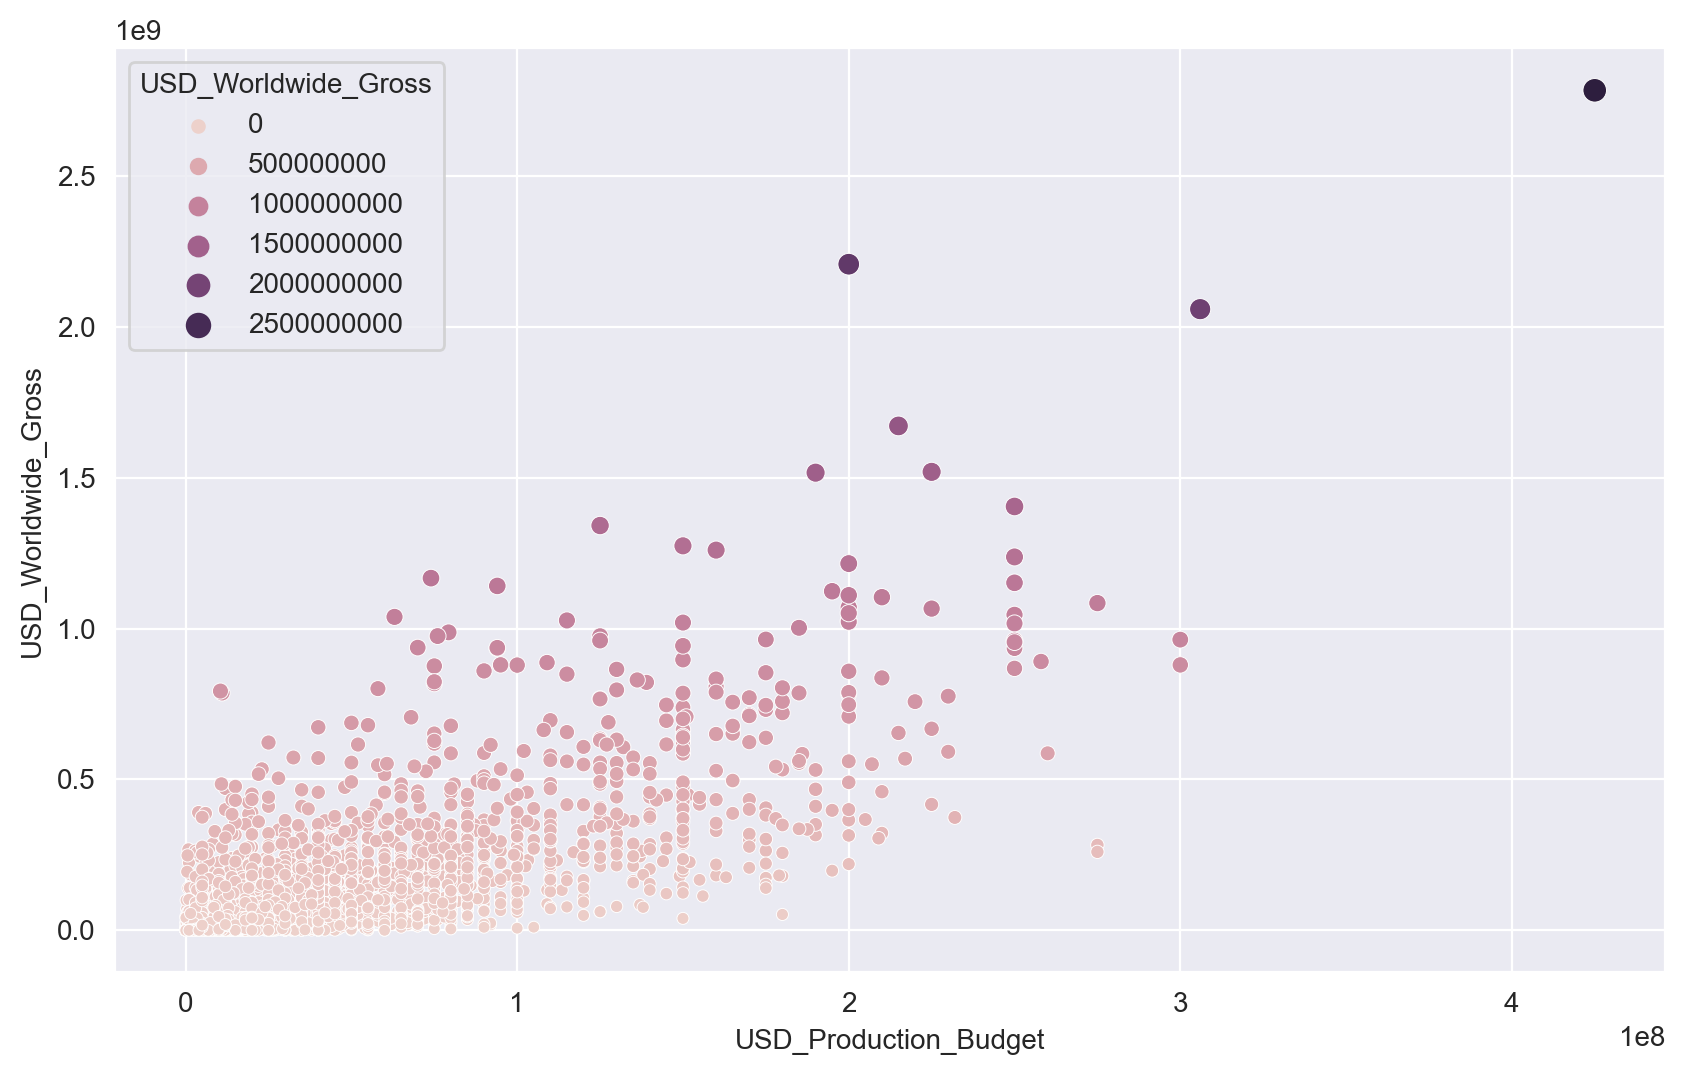

In [125]:
plt.figure(figsize=(10,6), dpi=200)

sns.set_style('darkgrid')
sns.scatterplot(data=data_clean,
 x='USD_Production_Budget', 
 y='USD_Worldwide_Gross',
 hue='USD_Worldwide_Gross', # colour
 size='USD_Worldwide_Gross',) # dot size


# Seaborn for Data Viz: Bubble Charts

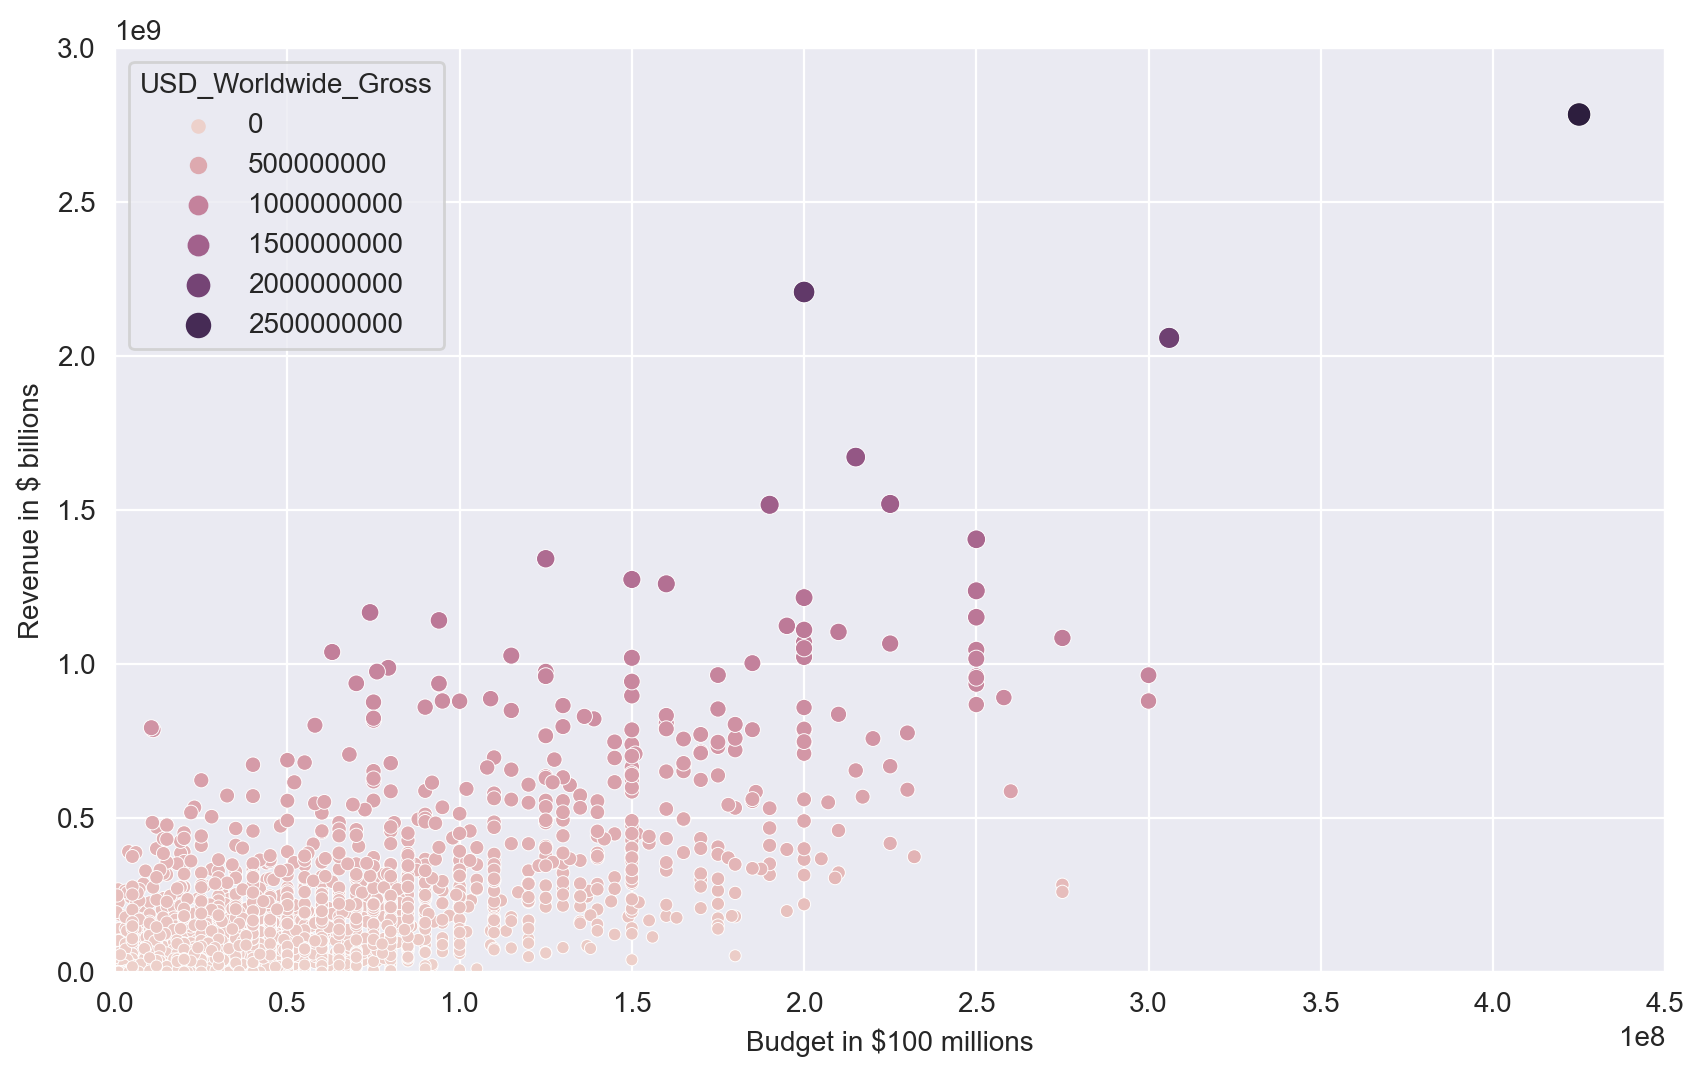

In [126]:
plt.figure(figsize=(10,6), dpi=200)

sns.set_style('darkgrid')
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



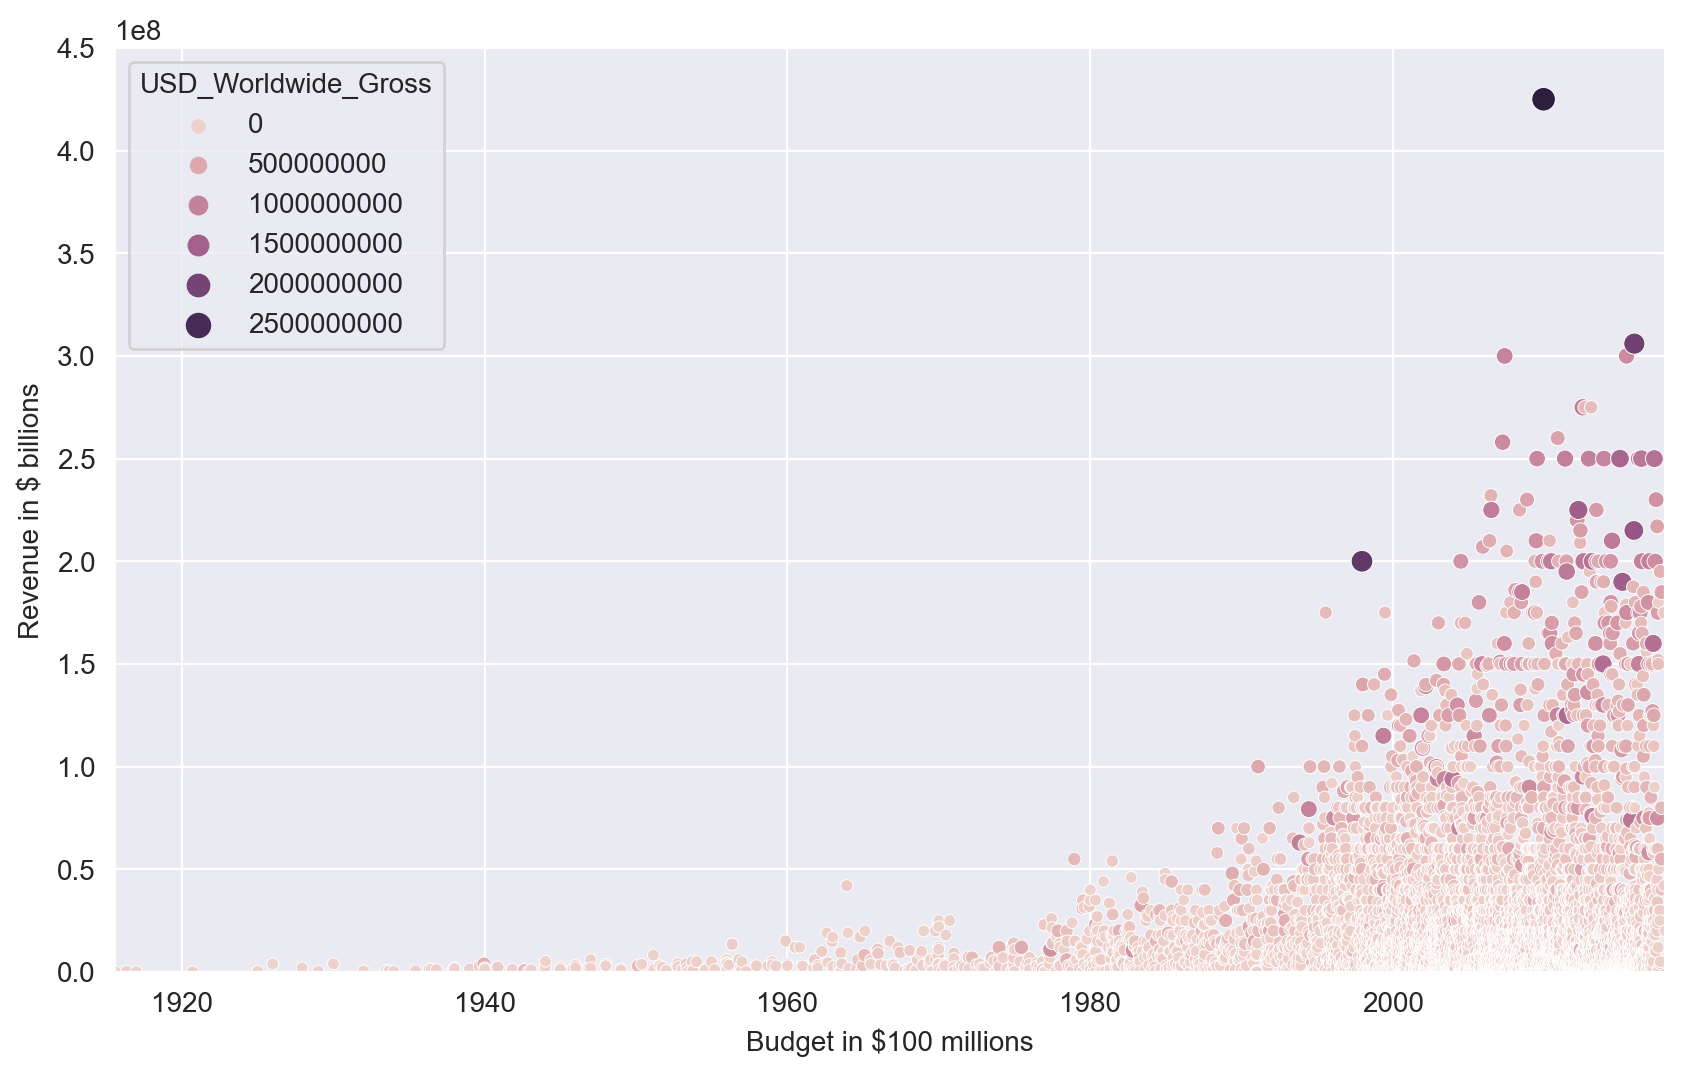

In [127]:
plt.figure(figsize=(10,6), dpi=200)

sns.set_style('darkgrid')
ax = sns.scatterplot(data=data_clean,
                     x='Release_Date',
                     y='USD_Production_Budget', 
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 450000000),
       xlim=(data_clean["Release_Date"].min(),data_clean["Release_Date"].max()),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [128]:
datetime_index_obj = pd.DatetimeIndex(data_clean["Release_Date"])
datetime_index_obj.year

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5383)

In [129]:
decades = datetime_index_obj.year // 10
decades

Index([191, 191, 191, 192, 192, 192, 192, 192, 193, 193,
       ...
       201, 201, 201, 201, 201, 201, 201, 201, 201, 201],
      dtype='int32', name='Release_Date', length=5383)

In [130]:
decades = decades*10
decades

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5383)

In [131]:
data_clean["decades"] = decades

C:\Users\aezhi\AppData\Local\Temp\ipykernel_14080\2962182347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["decades"] = decades


In [132]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [133]:
old_films = data_clean.query("decades < 1970" )

In [134]:
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960


In [135]:
new_films = data_clean.query("decades > 1970" )

In [136]:
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
262,1624,1980-01-01,Lion of the Desert,35000000,1500000,1500000,1980
263,3805,1980-01-01,Dressed to Kill,6500000,31899000,31899000,1980
264,4279,1980-01-01,Terror Train,3500000,8000000,8000000,1980
265,5144,1980-01-01,Maniac,350000,10000000,10000000,1980
266,4846,1980-01-02,The Fog,1000000,21378361,21378361,1980
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [137]:
old_films.sort_values("USD_Production_Budget",ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


In [138]:
old_films.sort_values("USD_Worldwide_Gross",ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decades
23,4248,1939-12-15,Gone with the Wind,3900000,390525192,198680470,1930
117,3594,1965-02-03,The Sound of Music,8200000,286214286,163214286,1960
28,4969,1942-08-13,Bambi,858000,268000000,102797000,1940
46,4434,1950-02-15,Cinderella,2900000,263591415,85000000,1950
18,4756,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925485,184925485,1930
...,...,...,...,...,...,...,...
66,4705,1955-12-31,The King’s Thief,1577000,0,0,1950
140,3559,1968-10-10,Barbarella,9000000,0,0,1960
1,5140,1916-05-09,Intolerance,385907,0,0,1910
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0,1930


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

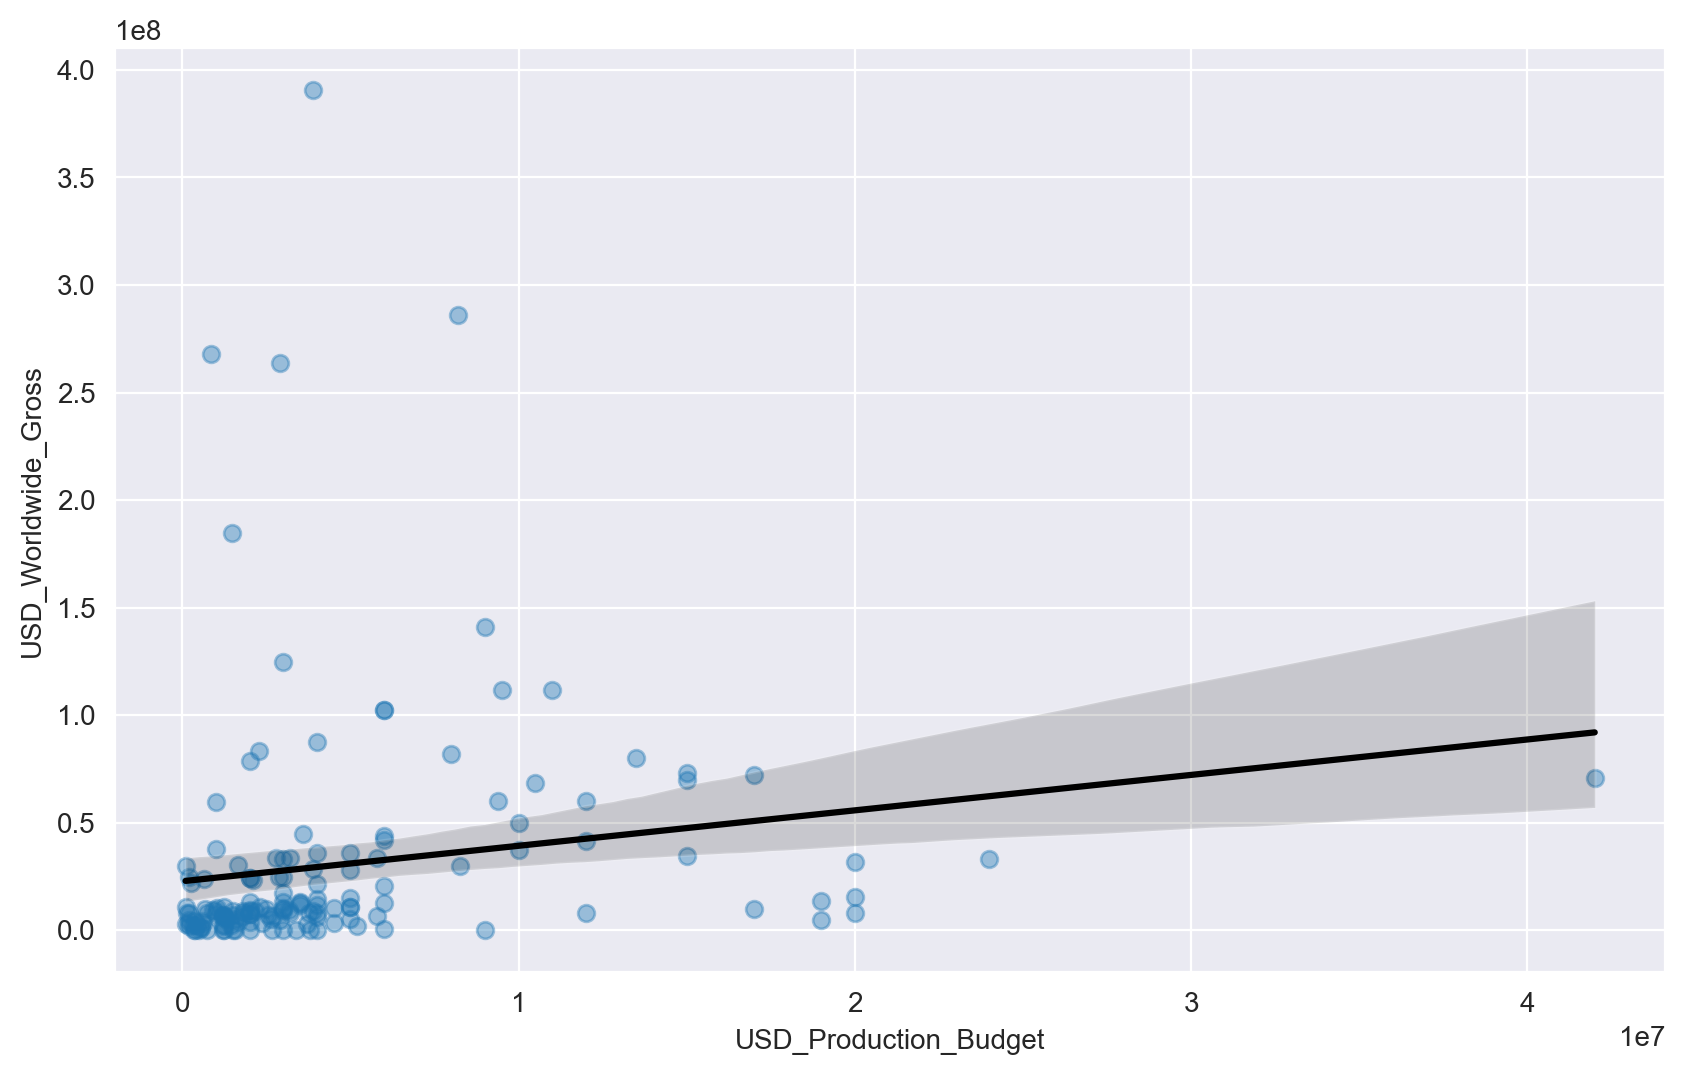

In [139]:
plt.figure(figsize=(10,6), dpi=200)

sns.set_style('darkgrid')
sns.regplot(data=old_films,
x='USD_Production_Budget', 
y='USD_Worldwide_Gross',
scatter_kws = {'alpha': 0.4},
line_kws = {'color': 'black'}) # dot size

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

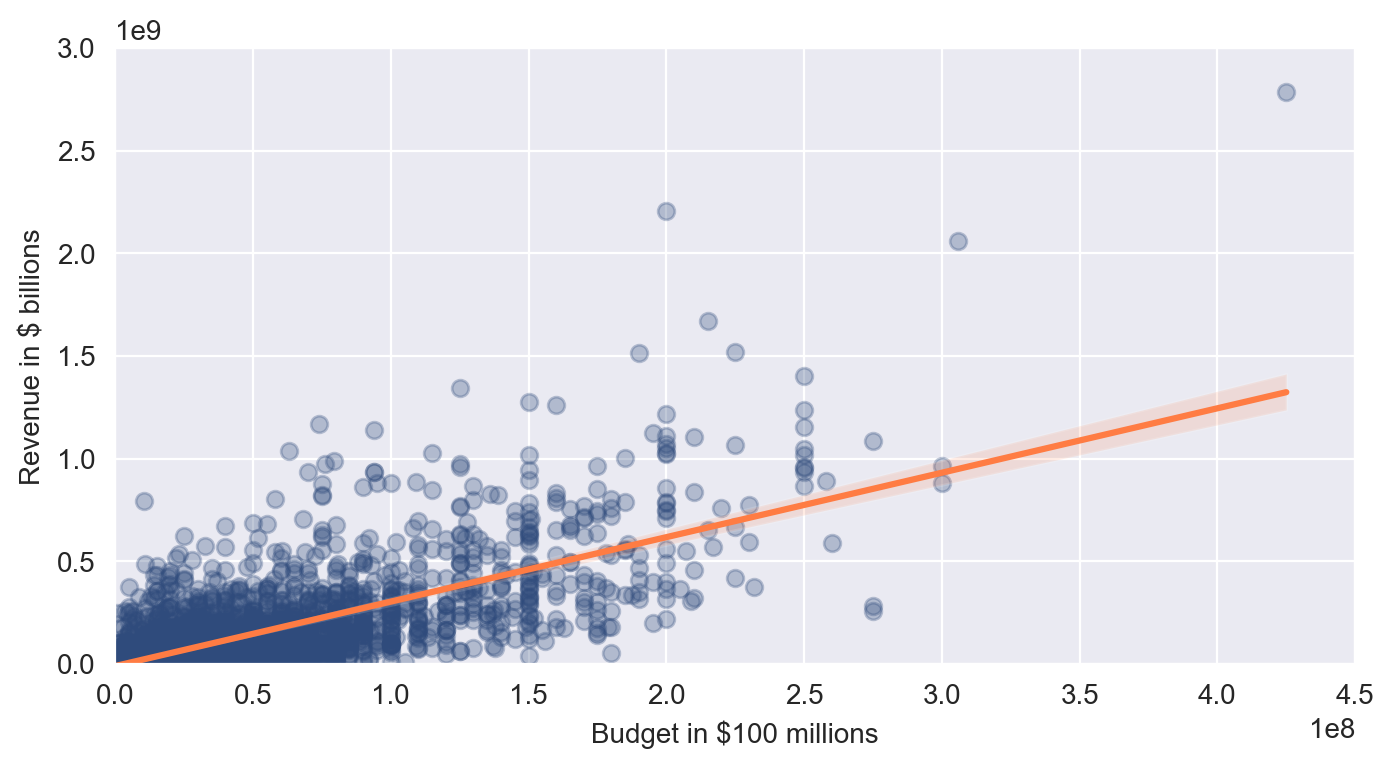

In [140]:
plt.figure(figsize=(8,4), dpi=200)
sns.set_style('darkgrid')
ax = sns.regplot(data=new_films,
           x='USD_Production_Budget',
           y='USD_Worldwide_Gross',
           color='#2f4b7c',
           scatter_kws = {'alpha': 0.3},
           line_kws = {'color': '#ff7c43'})
  
ax.set(ylim=(0, 3000000000),
     xlim=(0, 450000000),
     ylabel='Revenue in $ billions',
     xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [141]:
regression = LinearRegression()

In [142]:
X = pd.DataFrame(new_films["USD_Production_Budget"])
y = pd.DataFrame(new_films["USD_Worldwide_Gross"])

In [143]:
regression.fit(X,y)

LinearRegression()

In [144]:
#intercept 0
regression.intercept_

array([-10281713.35460526])

In [145]:
# slope 
regression.coef_

array([[3.13838346]])

In [146]:
regression.score(X,y)

0.5642267803291989

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [147]:
regression_old = LinearRegression()

In [148]:
X_old = pd.DataFrame(old_films["USD_Production_Budget"])
y_old = pd.DataFrame(old_films["USD_Worldwide_Gross"])

In [149]:
regression_old.fit(X_old,y_old)

LinearRegression()

In [150]:
regression_old.intercept_

array([22821538.63508038])

In [151]:
regression_old.coef_

array([[1.64771314]])

In [152]:
regression_old.score(X_old,y_old)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [153]:
budget_old = 350000000
revenue_old = regression_old.intercept_[0] + regression_old.coef_[0,0] * budget_old
revenue_estimate_old = round(revenue_old, -6)
print(f'The estimated revenue for a ${budget_old}  film is around ${revenue_estimate_old:.100}.')

The estimated revenue for a $350000000  film is around $600000000.0.


In [154]:
budget_new = 350000000
revenue_new = regression.intercept_[0] + regression.coef_[0,0] * budget_new
revenue_estimate_new = round(revenue_new, -6)
print(f'The estimated revenue for a ${budget_new} film is around ${revenue_estimate_new}')

The estimated revenue for a $350000000 film is around $1088000000.0


In [196]:
# direting passing values in predict to avoid calculating via formula
# predict required a model or 3 D array to be passed

#  we can use formula given above 
#  or use predict to find the target

budgey_2d =[[350000000]]
revenue_2d = regression.predict(budgey_2d)
print(f'The estimated revenue for a ${budget_old}  film is around ${revenue_2d[0][0]:.11}.')

The estimated revenue for a $350000000  film is around $1088152499.1.


C:\Users\aezhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
